In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('../data/trip.csv')

In [60]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [62]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [63]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [64]:

data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [65]:
data= data.drop_duplicates()

In [66]:
data[data['passenger_name']=='Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [67]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [68]:
data['fare_amount'].isna().sum()/len(data)

0.0001321644125291863

In [69]:
data = data[~data['fare_amount'].isna()]

In [70]:
data['fare_amount'].isna().sum()

0

In [71]:
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

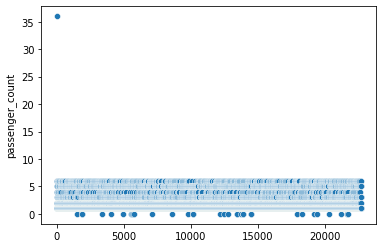

In [72]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [73]:
data = data[data['passenger_count'] <= 6]

In [74]:
len(data[data['passenger_count'] == 0])

33

In [75]:
data = data[data['passenger_count'] != 0]

<AxesSubplot:ylabel='passenger_count'>

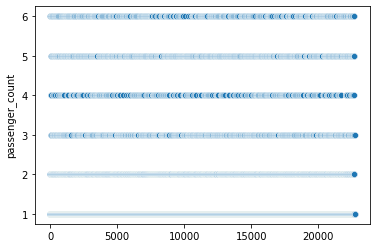

In [76]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [77]:
data['trip_distance'].sort_values().tail(15)

15171    26.54
4140     26.86
20547    27.20
1910     27.34
20614    27.88
2594     27.97
10304    28.20
15352    28.23
5794     30.33
18132    30.50
30       30.83
10293    31.95
6066     32.72
13863    33.92
9282     33.96
Name: trip_distance, dtype: float64

In [78]:
data['trip_distance'].describe()

count    22662.000000
mean         2.912906
std          3.652999
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

<AxesSubplot:ylabel='trip_distance'>

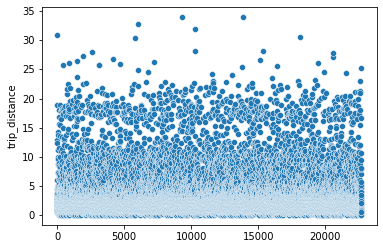

In [79]:
sns.scatterplot(x = data.index, y = data['trip_distance'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

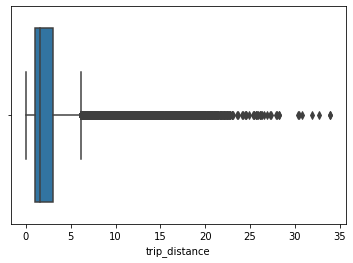

In [80]:
sns.boxplot( data['trip_distance'])

In [81]:
data = data[data['trip_distance']<=25]

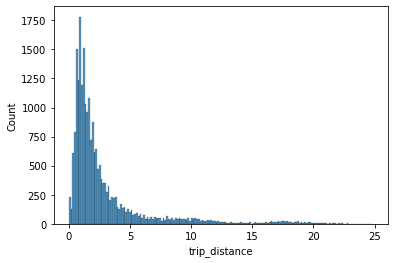

In [82]:
sns.histplot(data=data, x=data['trip_distance'])
plt.show()

In [83]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22636.000000,22636.000000,22636.000000,22636.000000,22636.000000
mean,1.644593,2.884068,12.941498,1.822817,0.307298
std,1.284454,3.553396,12.978440,2.739386,1.383012
min,1.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.600000,9.500000,1.350000,0.000000
75%,2.000000,3.040000,14.500000,2.450000,0.000000
max,6.000000,24.890000,999.990000,200.000000,19.100000


In [84]:
len(data[data['fare_amount']<=0])

20

In [85]:
data= data[data['fare_amount']>0]

In [86]:
data.sort_values('fare_amount', ascending=False).head(20)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.00,0.00
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,450.00,0.00,0.00
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,200.00,11.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.00,12.50
11271,Daniel Carrillo,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,Cash,2,0.00,120.00,20.00,11.52
13623,Erica Byrd,11/04/2017 1:32:14 PM,11/04/2017 2:18:50 PM,Debit Card,2,19.80,105.00,8.00,2.64
7283,Phillip Vasquez,01/01/2017 3:02:53 AM,01/01/2017 3:03:02 AM,Credit Card,1,0.00,100.00,20.16,0.00
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.00,25.20,0.00


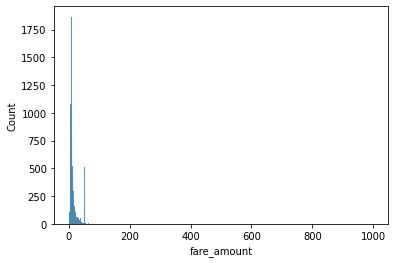

In [87]:
sns.histplot(data=data, x=data['fare_amount'])
plt.show()

In [88]:
data= data[data['fare_amount']<=200]

<AxesSubplot:ylabel='fare_amount'>

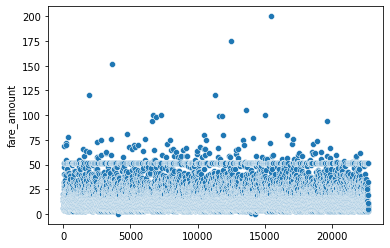

In [89]:
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [90]:
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [91]:
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22614, dtype: float64

In [92]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [93]:
data.sort_values('fare_amount', ascending=False)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.0,150.00,11.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.0,150.00,46.69,11.75
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.3,150.00,0.00,0.00
11271,Daniel Carrillo,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,Cash,2,0.0,120.00,20.00,11.52
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.5,120.00,5.00,12.50
...,...,...,...,...,...,...,...,...,...
10641,Darrell Hoffman,12/20/2017 3:20:42 PM,12/20/2017 3:20:48 PM,Cash,2,0.0,2.50,0.00,0.00
11514,Melissa Johnson,07/11/2017 12:23:27 AM,07/11/2017 12:23:30 AM,Credit Card,1,0.0,2.50,0.00,0.00
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.0,1.00,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.5,0.01,0.00,10.50


<AxesSubplot:ylabel='tip_amount'>

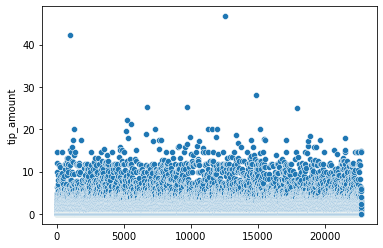

In [95]:
sns.scatterplot(x = data.index, y = data['tip_amount'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip_amount'>

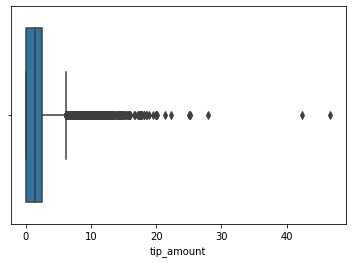

In [96]:
sns.boxplot( data['tip_amount'])

In [97]:
data = data[data['tip_amount'] <=30]

In [98]:
len(data)

22612

<AxesSubplot:ylabel='tolls_amount'>

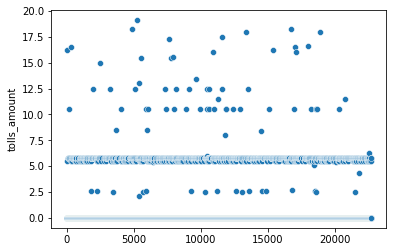

In [99]:
sns.scatterplot(x = data.index, y = data['tolls_amount'])

In [100]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [101]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [102]:
data['payment_method'].nunique()

3

In [103]:
data['payment_method'].value_counts()

Cash           11154
Debit Card      5756
Credit Card     5702
Name: payment_method, dtype: int64

In [105]:
data['payment_method'] = data['payment_method'].replace({'Debit Card':'Card', 'Credit Card': 'Card'})

In [106]:
data['payment_method'].value_counts()

Card    11458
Cash    11154
Name: payment_method, dtype: int64

In [107]:
example = 'Susan Robinson'

In [108]:
example.split()

['Susan', 'Robinson']

In [111]:
data['passenger_first_name'] = data['passenger_name'].str.split().apply(lambda x:x[-1])

In [112]:
data['passenger_first_name']

0           Duffy
1          Foster
2           Combs
3             Ray
4         Johnson
           ...   
22696     Johnson
22697    Williams
22698      Graves
22699    Copeland
22700      Miller
Name: passenger_first_name, Length: 22612, dtype: object

In [115]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [117]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [118]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [132]:
data['travel_time'] = data['travel_time'].dt.seconds

In [133]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Duffy,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Foster,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Combs,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Ray,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Johnson,1003


In [134]:
data['total_amount'] = data['fare_amount']+ data['tip_amount']

In [135]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Duffy,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Foster,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Combs,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Ray,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Johnson,1003,16.50


<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

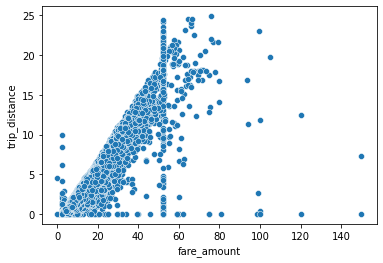

In [136]:
sns.scatterplot(x = data['fare_amount'], y = data['trip_distance'])

<AxesSubplot:xlabel='fare_amount', ylabel='travel_time'>

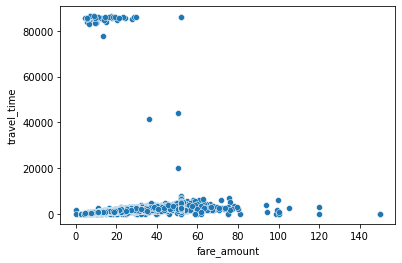

In [137]:
sns.scatterplot(x = data['fare_amount'], y = data['travel_time'])

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time'>

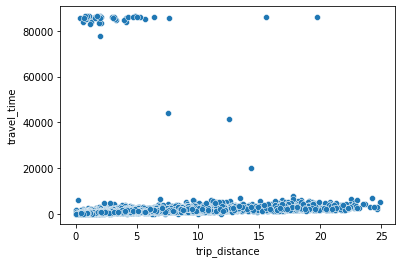

In [138]:
sns.scatterplot(x = data['trip_distance'], y = data['travel_time'])

In [142]:
data = data[data['travel_time'] <=20000]

In [143]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Duffy,844,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Foster,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Combs,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Ray,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Johnson,1003,16.50
